![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [133]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})
crimes.head()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


The hour with highest frequency of crime is: 12

The area which has the largest frequency of night crimes is: Central.

Crimes committed against victims of different age groups:
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: age_bracket, dtype: int64.

Top 5 communites susceptible to crime are:
H    74128
W    44985
B    34931
O    16331
A     5519
Name: Vict Descent, dtype: int64.


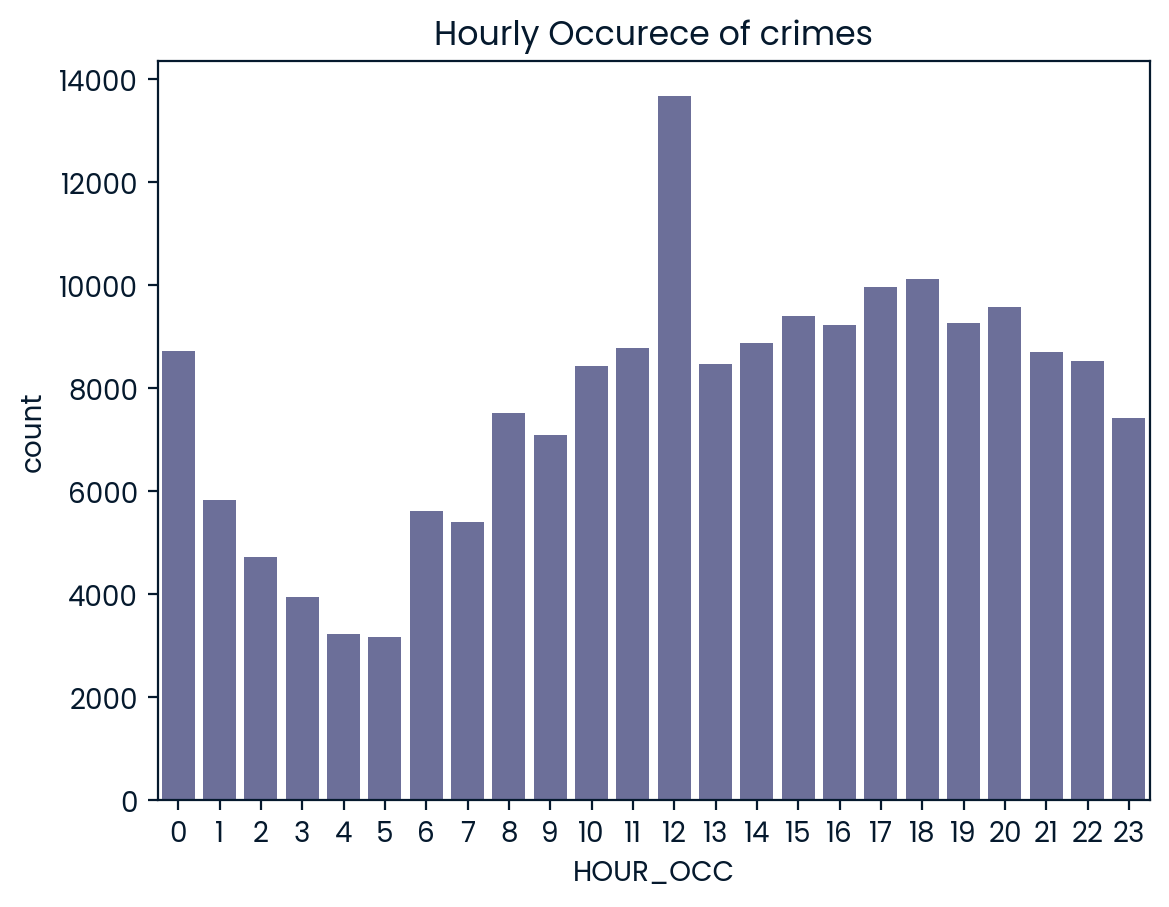

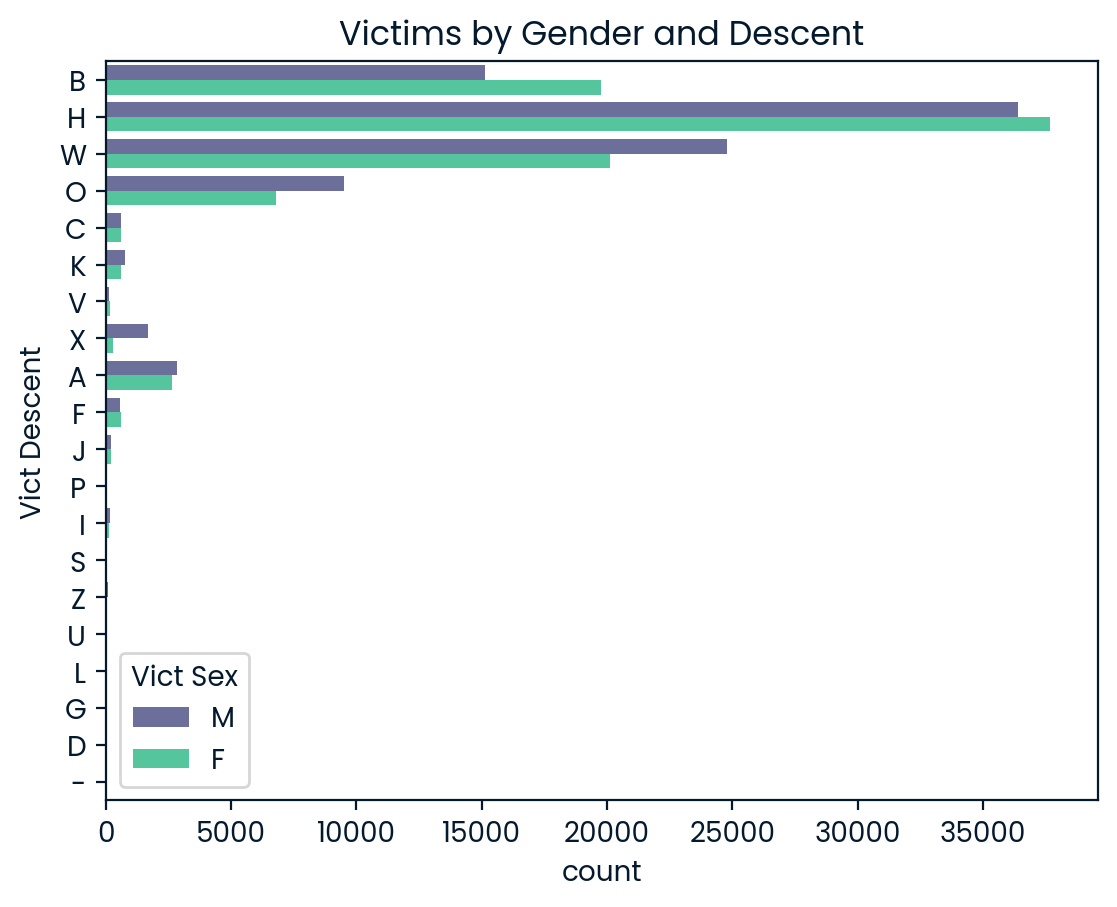

In [134]:
# Start coding here
# Which hour has the highest frequency of crimes? 
crimes["HOUR_OCC"] = crimes["TIME OCC"].str[:2].astype(int)
peak_crime_hour = crimes["HOUR_OCC"].value_counts().index[0]
plt.figure()
sns.countplot(data=crimes,x="HOUR_OCC")
plt.title("Hourly Occurece of crimes")
plt.show
print(f"The hour with highest frequency of crime is: {peak_crime_hour}")

# Which area has the largest frequency of night crimes 
night_crimes = crimes[crimes["HOUR_OCC"].isin([22,23,0,1,2,3])]
peak_night_crime_location = night_crimes.groupby("AREA NAME", as_index=False)["HOUR_OCC"].count().sort_values("HOUR_OCC",ascending=False).iloc[0]["AREA NAME"]
print(f"\nThe area which has the largest frequency of night crimes is: {peak_night_crime_location}.")

# Identify the number of crimes committed against victims of different age groups
age_bins = [0,17,25,34,44,54,64,np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
crimes["age_bracket"] = pd.cut(crimes["Vict Age"],bins=age_bins,labels=age_labels)
victim_ages = crimes["age_bracket"].value_counts()
print(f"\nCrimes committed against victims of different age groups:\n{victim_ages}.")

# which gender and descent had more victims?
crimes_descent = crimes["Vict Descent"].value_counts()
Top_5 = crimes_descent.sort_values(ascending=False).head(5)
print(f"\nTop 5 communites susceptible to crime are:\n{Top_5}.")
plt.figure()
sns.countplot(data=crimes,y="Vict Descent",hue="Vict Sex",hue_order=['M','F'])
plt.title("Victims by Gender and Descent")
plt.show()





